<a href="https://colab.research.google.com/github/terrakorp/test-repo/blob/master/matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#MATPLOTLIB
Uno de los elementos más utiles en el analisis de datos en machine learning es la visualización de los datos en forma gráfica

La libreria matplotlib permite hacer graficas de dos dimensiones y algunas más especializadas con el fin de facilitar este proceso.


In [35]:
import math
import matplotlib.pyplot as plt


#PYPLOT
Es una clase de la libreria matplotlib que facilita le presentacion de datos graficamente.

La forma más facil requiere de una lista de valores para el eje X y otra para el eje Y

In [4]:
# los datos del eje x
X = [1,2,3,4,5]
#los datos a graficar en y
Y = [100, 67, 2, 87, 90]

Para dibujar  basta con invocar los métodos plot y show de pyplot

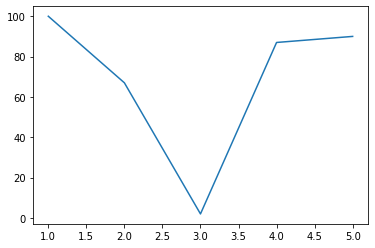

In [7]:
plt.plot(X,Y)
plt.show()

Para dibujar se instancia un objeto con las estructuras de datos y metodos variantes de dibujo

La entidad contiene titulos y etiquetas del gráfico asi como los valores

No handles with labels found to put in legend.


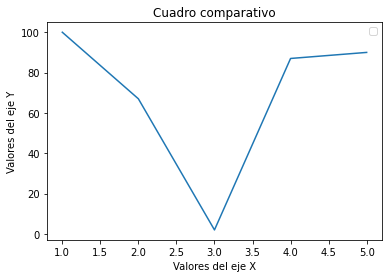

In [9]:
# capturar la estructura de la imagen
fig, ax = plt.subplots()
ax.set_xlabel ("Valores del eje X")     # Definir la etiqueta de identificacion de los valores en X
ax.set_ylabel("Valores del eje Y")      # Definir la etiqueta de identificacion de los valores en Y
ax.set_title("Cuadro comparativo")      # Definir el titulo de la gráfica

plt.plot(X,Y)
plt.show()

El tipo de gráfica puede ser variado asi como su apariencia:

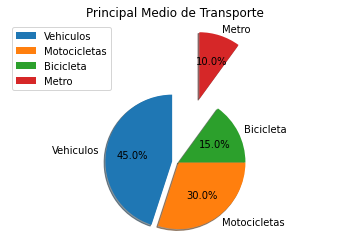

In [10]:
# Nuevo juego de datos
medios_transporte = ['Vehiculos', 'Motocicletas', 'Bicicleta', 'Metro']
# Declarar el tamaño de cada sección
sizes = [45, 30, 15, 10]
# señalar la sección que se resalta
explode = (0.1, 0, 0, 1) 
fig1, ax1 = plt.subplots()		#Capturar la estructura de control

#generar el gráfico de PIE
ax1.pie(sizes, explode=explode, labels=medios_transporte, autopct='%1.1f%%', shadow=True, startangle=90)
#seleccionar la forma de la gráfica(equal corresponde a PIE)
ax1.axis('equal')
plt.title("Principal Medio de Transporte")
plt.legend()
plt.show()

#**Métricas de similitud**
Son mecanismos de valoracion de los distintos aspectos o FEATUREs que describen el comportamiento de una entidad y que permiten estimar su similaridad con otros individuos

##Metrica de Metropolis
Cálcula la distancia como la suma de las distancias individuales en cada dimensión.
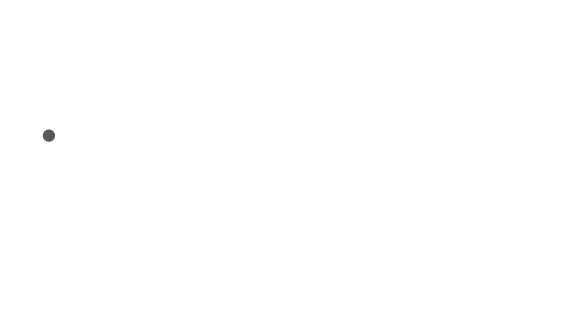



##Métrica euclidiana
Cálcula la similitud entre individuos usando la definición de distancia lineal de Euclides.

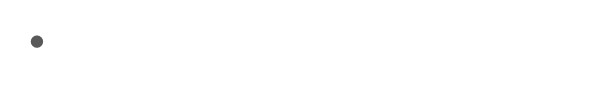


##Distancia de Minkowski.
Define la distancia lineal en N dimensiones y en general es una expansión de las demás métricas basadas en el mismo principio.

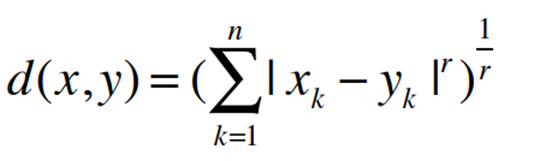


La función para calcular cualquier métrica de distancia lineal a partir de la definición de Minkowski puede establecerse como:

In [30]:
# entradas:
# individuo1: una lista con los valores para uno de los individuos
# individuo2: lista de f¿valores para los features del segundo individuo
# r: establece el tipo de métrica:
#    - 1: Distancia Metro
#    - 2: Distancia euclidiana

def distancia(individuo1, individuo2, r):
  distancia = 0
  if r == 0:
    return "No se establecio un tipo de métrica válida"
  sumatoria = 0
  for feature in range(len(individuo1)):
    sumatoria += pow(abs(individuo1[feature] - individuo2[feature]), r)
  distancia = pow(sumatoria, (1/r))
  return distancia

In [33]:
x = [10,50]
y = [30,60]
z = distancia(x,y,0)
z

'No se establecio un tipo de métrica válida'

## Distribuciones anormales de datos
En ocasiones los usuarios son benignos con sus evaluaciones y prefieren estrechar las escalas a valores en torno al promedio:

  

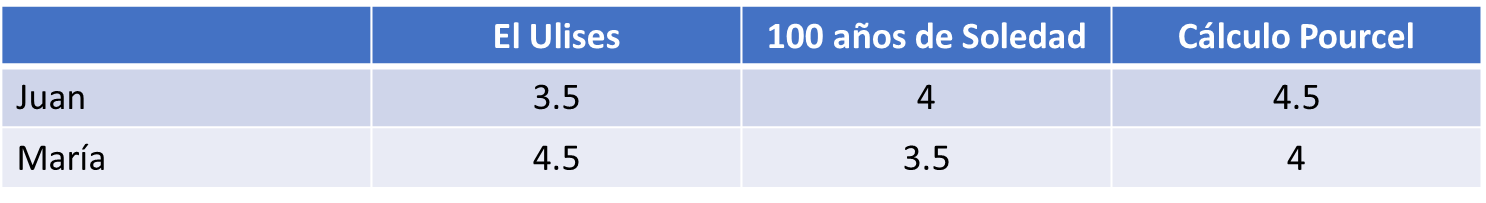






En estos casos es más adecuado aplicar valoraciones de similitud que identifiquen la correlación de features

## Correlación de Features
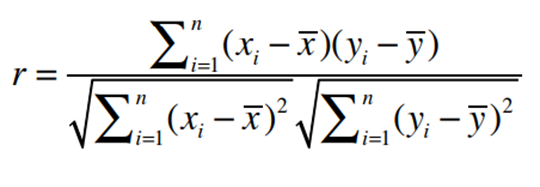

Sin embargo esta ecuación requiere contnua evalución sobre todo el conjunto de datos por lo que es computacionalmente costosa.

Para aplicar el analisis de correlación se prefiere una version mas simple del modelo de Pearson:



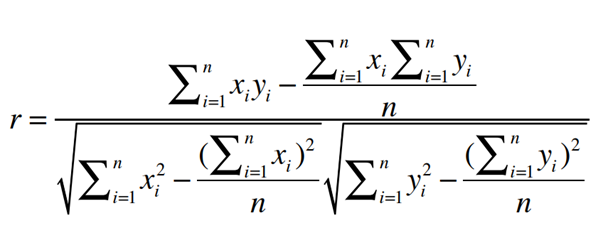

La correlación de pearson simplificada se puede aplicar de manera más directa como se aprecia en la función:

In [38]:
def similitud_pearson(individuo1, individuo2):
  n = len(individuo1)
  m = len(individuo2)
  if (n <= 0) or ( m <= 0):
    return "Uno de los individuos no tiene features!!"

  productoFeatures = 0                        # Acumula la suma de productos Xi*Yi
  sumatoriaIndividuo1 = 0                     # Acumula la suma de Xi
  sumatoriaIndividuo2 = 0                     # Acumula la suma de Yi
  sumaCuadradaIndividuo1 = 0                  # Acumula la suma de cuadrados (Xi)^2
  sumaCuadradaIndividuo2 = 0                  # Acumula la suma de cuadrados (Yi)^2
  for feature in range(len(individuo1)):
    productoFeatures += individuo1[feature] * individuo2[feature]
    sumatoriaIndividuo1 += individuo1[feature]
    sumatoriaIndividuo2 += individuo2[feature]
    sumaCuadradaIndividuo1 += pow(individuo1[feature],2)
    sumaCuadradaIndividuo2 += pow(individuo2[feature],2)
  # calcular el denominador
  denominador = math.sqrt(sumaCuadradaIndividuo1 -(pow(sumatoriaIndividuo1,2)/n))
  denominador *= math.sqrt(sumaCuadradaIndividuo2 -(pow(sumatoriaIndividuo2,2)/n))
  # calcular el numerador
  numerador = productoFeatures - ((sumatoriaIndividuo1 * sumatoriaIndividuo2)/n)
  # entregar el coeficiente de correlación
  return numerador / denominador 




In [44]:
x = [10,50, 4]
y = [0,10, 1]
z = similitud_pearson(x,y)
z

0.9777869843534489

## Similitud de Coseno
Cuando la cantidad de features es tal que hay gran presencia de 0's (sparcicity), las métricas de distancia o de correlación no tiene buen desempeño

en estos casos la métrica más adecuada es la similitud de Coseno, definida como:


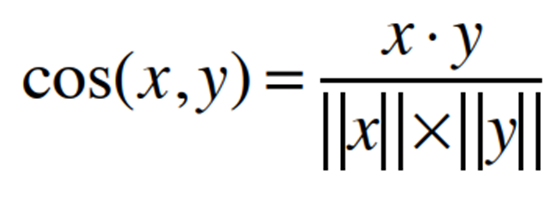